In [2]:
import pandas as pd
import numpy as np 


In [12]:
df = pd.read_csv('C:\\Users\\eduar\\Documents\\real_state\\data\\sell.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567135 entries, 0 to 567134
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   created_on                  567135 non-null  object 
 1   operation                   567135 non-null  object 
 2   property_type               567135 non-null  object 
 3   place_name                  567135 non-null  object 
 4   place_with_parent_names     567135 non-null  object 
 5   geonames_id                 97 non-null      float64
 6   lat-lon                     273006 non-null  object 
 7   lat                         273006 non-null  float64
 8   lon                         273006 non-null  float64
 9   price                       530859 non-null  float64
 10  currency                    530841 non-null  object 
 11  price_aprox_local_currency  530859 non-null  float64
 12  price_aprox_usd             530859 non-null  float64
 13  surface_total_

In [6]:
df.columns

Index(['created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'state'],
      dtype='object')

In [10]:
df.currency.value_counts()

currency
BRL    530595
USD       167
MXN        79
Name: count, dtype: int64

In [14]:
cols = ['created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'geonames_id', 'lat-lon', 'lat', 'lon','properati_url',
       'description', 'title', 'image_thumbnail']

df = df.drop(columns=cols, axis=1)

In [16]:
df = df[df['currency'] == 'BRL']
df = df.drop(columns='currency', axis=1)

In [17]:
df.head(5)

,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,state
0,155900.0,155608.08,48648.81,NaN,NaN,NaN,NaN,NaN,2.0,NaN,Ceará
4,95000.0,94822.11,29644.88,NaN,NaN,NaN,NaN,NaN,3.0,NaN,Minas Gerais
5,220000.0,219588.08,68651.31,NaN,NaN,NaN,NaN,NaN,3.0,NaN,Minas Gerais
26,230000.0,229569.34,71771.82,NaN,NaN,NaN,NaN,NaN,1.0,NaN,São Paulo
27,195000.0,194634.87,60850.02,NaN,NaN,NaN,NaN,NaN,2.0,NaN,São Paulo


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530595 entries, 0 to 567134
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   price                       530595 non-null  float64
 1   price_aprox_local_currency  530595 non-null  float64
 2   price_aprox_usd             530595 non-null  float64
 3   surface_total_in_m2         129129 non-null  float64
 4   surface_covered_in_m2       397039 non-null  float64
 5   price_usd_per_m2            390111 non-null  float64
 6   price_per_m2                390111 non-null  float64
 7   floor                       49566 non-null   float64
 8   rooms                       338226 non-null  float64
 9   expenses                    190860 non-null  float64
 10  state                       530595 non-null  object 
dtypes: float64(10), object(1)
memory usage: 48.6+ MB


In [23]:
df_filtered = df[df['surface_total_in_m2'].notna()][['surface_total_in_m2', 'surface_covered_in_m2']]
print(df_filtered)


        surface_total_in_m2  surface_covered_in_m2
391                   260.0                  180.0
392                   160.0                  109.0
393                   197.0                  130.0
394                   300.0                  145.0
396                   200.0                  130.0
...                     ...                    ...
566920                175.0                  115.0
566921                100.0                   50.0
566923                 80.0                   80.0
566924                 65.0                   65.0
566925                 76.0                   76.0

[129129 rows x 2 columns]


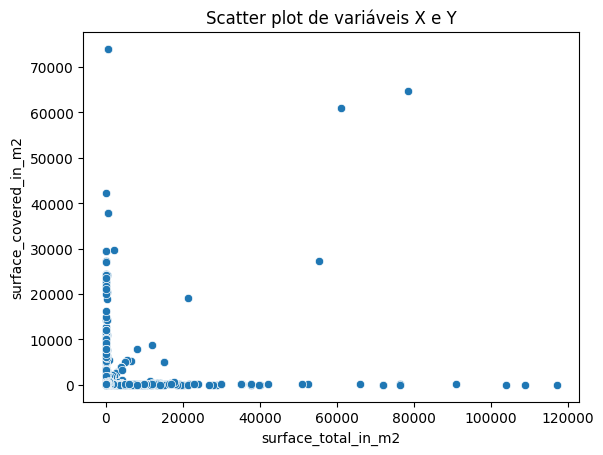

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='surface_total_in_m2', y='surface_covered_in_m2')
plt.title('Scatter plot de variáveis X e Y')
plt.show()
